<a href="https://colab.research.google.com/github/HumanRtrUni/ml_class_assignment/blob/main/cse23247_ml_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving heart_cleveland_upload.csv to heart_cleveland_upload.csv
A1: Train Confusion Matrix:
 [[93 35]
 [32 77]]
A1: Test Confusion Matrix:
 [[14 18]
 [14 14]]
A1: Train Classification Report:
 {'0': {'precision': 0.744, 'recall': 0.7265625, 'f1-score': 0.7351778656126482, 'support': 128.0}, '1': {'precision': 0.6875, 'recall': 0.7064220183486238, 'f1-score': 0.6968325791855203, 'support': 109.0}, 'accuracy': 0.7172995780590717, 'macro avg': {'precision': 0.71575, 'recall': 0.7164922591743119, 'f1-score': 0.7160052223990843, 'support': 237.0}, 'weighted avg': {'precision': 0.7180147679324894, 'recall': 0.7172995780590717, 'f1-score': 0.7175422697453193, 'support': 237.0}}
A1: Test Classification Report:
 {'0': {'precision': 0.5, 'recall': 0.4375, 'f1-score': 0.4666666666666667, 'support': 32.0}, '1': {'precision': 0.4375, 'recall': 0.5, 'f1-score': 0.4666666666666667, 'support': 28.0}, 'accuracy': 0.4666666666666667, 'macro avg': {'precision': 0.46875, 'recall': 0.46875, 'f1-score': 0.4

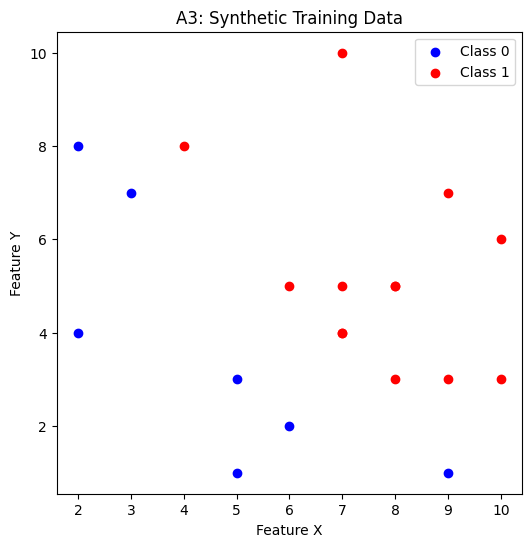

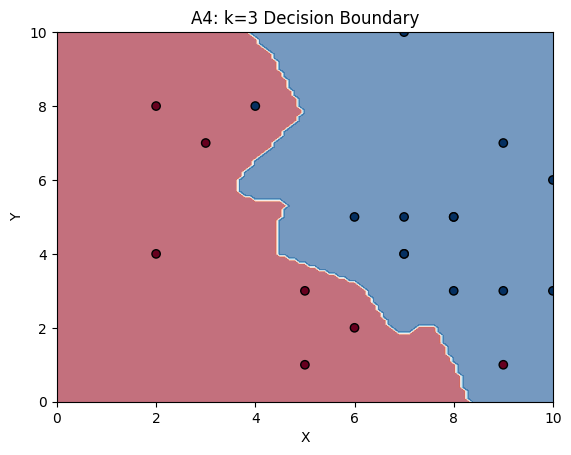

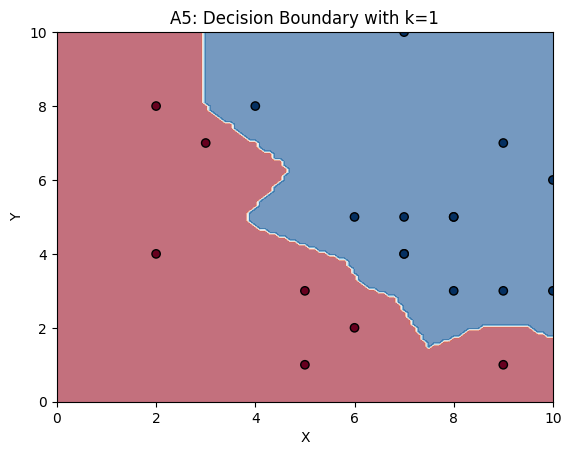

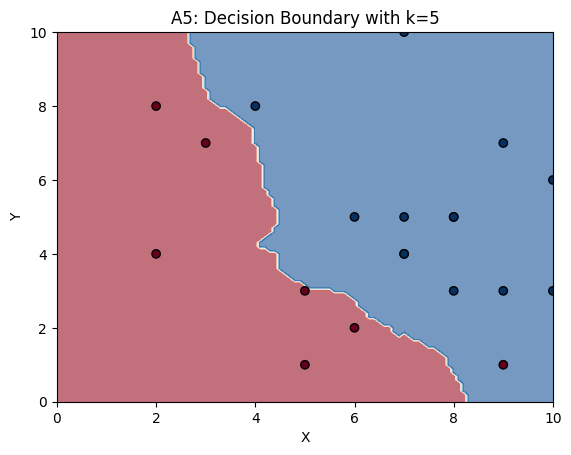

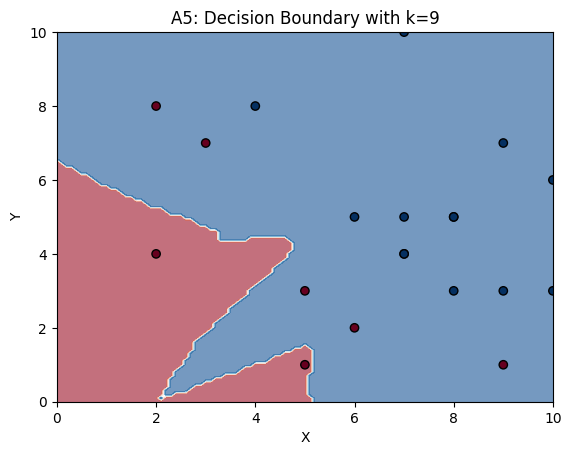

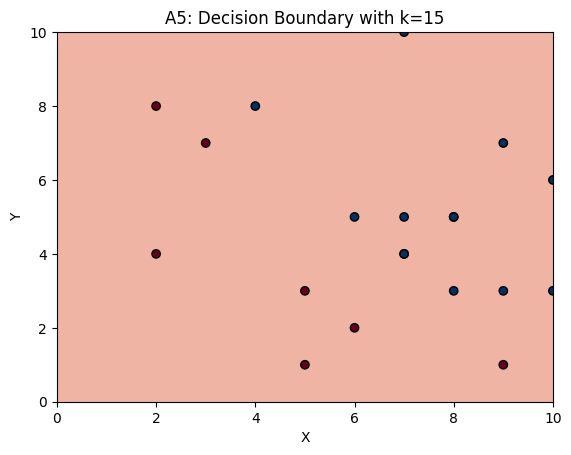

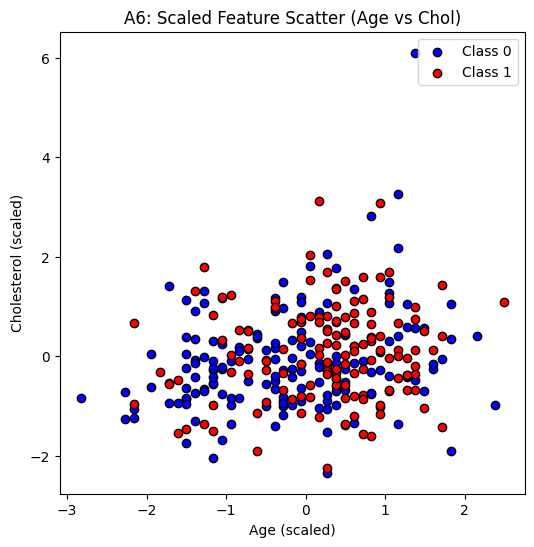

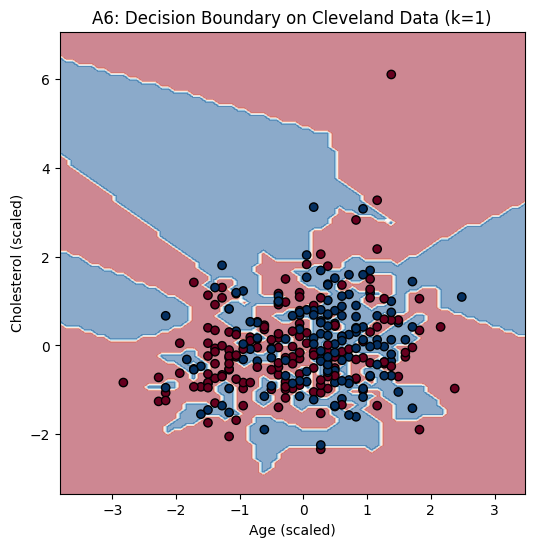

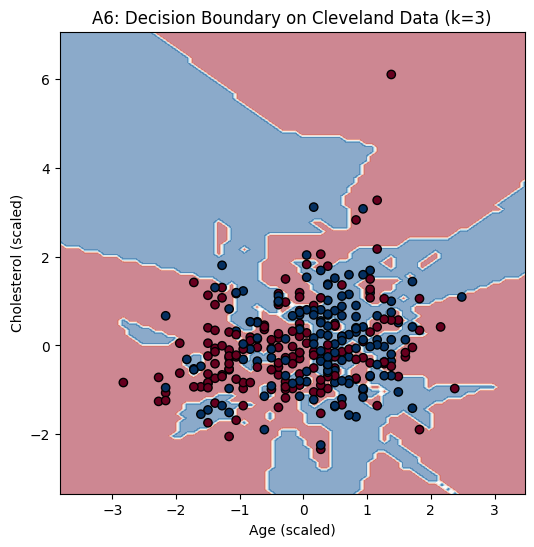

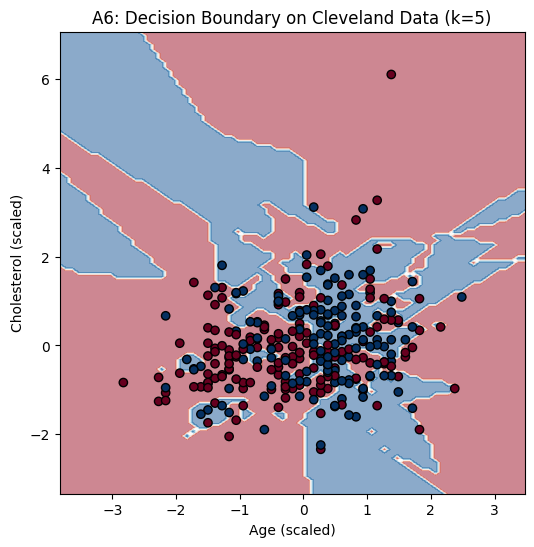

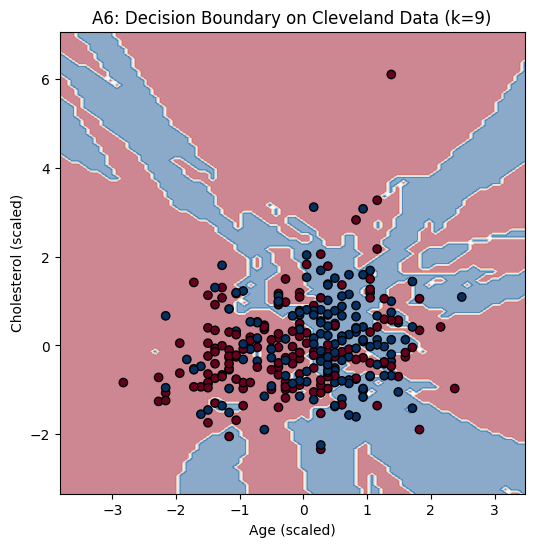

A7: Best k = 1, Cross-validation Accuracy = 0.60


In [17]:
# Lab04 Assignment

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import io

from google.colab import files
uploaded = files.upload()  # Upload your heart_cleveland_upload.csv here

import io
data = pd.read_csv(io.BytesIO(uploaded['heart_cleveland_upload.csv']))


# --------------------------------------------
# A1. Evaluate confusion matrix for your classification problem.
# From confusion matrix, derive precision, recall, F1-score for train and test.
# Infer the model's learning outcome: underfit / regularfit / overfit.
# --------------------------------------------

features = ['age', 'chol']  # You may change these based on your dataset
X = data[features]
# Correcting the target column name
y = data['condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def evaluate_model(X_train, X_test, y_train, y_test, k=5):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_report = classification_report(y_train, y_train_pred, output_dict=True)
    test_report = classification_report(y_test, y_test_pred, output_dict=True)
    train_conf = confusion_matrix(y_train, y_train_pred)
    test_conf = confusion_matrix(y_test, y_test_pred)
    return model, train_conf, test_conf, train_report, test_report

model, train_conf, test_conf, train_report, test_report = evaluate_model(X_train_scaled, X_test_scaled, y_train, y_test, k=5)
print("A1: Train Confusion Matrix:\n", train_conf)
print("A1: Test Confusion Matrix:\n", test_conf)
print("A1: Train Classification Report:\n", train_report)
print("A1: Test Classification Report:\n", test_report)

# --------------------------------------------
# A2. Calculate MSE, RMSE, MAPE and R2 scores
# for a sample price prediction exercise (dummy regression data).
# --------------------------------------------

def regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mape, r2

y_true = np.array([100, 150, 200, 250, 300])
y_pred = np.array([110, 145, 195, 240, 310])
mse, rmse, mape, r2 = regression_metrics(y_true, y_pred)
print(f"A2: MSE = {mse:.2f}, RMSE = {rmse:.2f}, MAPE = {mape:.2f}%, R2 Score = {r2:.2f}")

# --------------------------------------------
# A3. Generate 20 data points with 2 features (X & Y),
# assign them to class 0 (blue) or 1 (red) and make a scatter plot.
# --------------------------------------------

def generate_training_data():
    np.random.seed(42)
    X = np.random.randint(1, 11, size=(20, 2))
    y = np.array([0 if x[0] + x[1] < 11 else 1 for x in X])
    return X, y

X_train_vis, y_train_vis = generate_training_data()
plt.figure(figsize=(6,6))
for cls, color in zip([0, 1], ['blue', 'red']):
    plt.scatter(X_train_vis[y_train_vis == cls][:,0], X_train_vis[y_train_vis == cls][:,1], c=color, label=f"Class {cls}")
plt.title("A3: Synthetic Training Data")
plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.legend()
plt.show()

# --------------------------------------------
# A4. Generate a test set grid with values from 0 to 10 (step=0.1).
# Classify these points using KNN (k=3), visualize class regions.
# --------------------------------------------

def generate_test_data_and_classify(model):
    xx, yy = np.meshgrid(np.arange(0, 10.1, 0.1), np.arange(0, 10.1, 0.1))
    test_points = np.c_[xx.ravel(), yy.ravel()]
    predictions = model.predict(test_points)
    return xx, yy, predictions.reshape(xx.shape)

model_vis = KNeighborsClassifier(n_neighbors=3)
model_vis.fit(X_train_vis, y_train_vis)
xx, yy, Z = generate_test_data_and_classify(model_vis)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.6)
plt.scatter(X_train_vis[:, 0], X_train_vis[:, 1], c=y_train_vis, edgecolor='k', cmap=plt.cm.RdBu)
plt.title("A4: k=3 Decision Boundary")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# --------------------------------------------
# A5. Repeat A4 with different values of k.
# Observe the decision boundaries.
# --------------------------------------------

for k in [1, 5, 9, 15]:
    model_k = KNeighborsClassifier(n_neighbors=k)
    model_k.fit(X_train_vis, y_train_vis)
    _, _, Zk = generate_test_data_and_classify(model_k)
    plt.contourf(xx, yy, Zk, cmap=plt.cm.RdBu, alpha=0.6)
    plt.scatter(X_train_vis[:, 0], X_train_vis[:, 1], c=y_train_vis, edgecolor='k', cmap=plt.cm.RdBu)
    plt.title(f"A5: Decision Boundary with k={k}")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

# --------------------------------------------
# A6. Repeat A3 to A5 for your project data (e.g., heart.csv)
# using any two features and classes.
# --------------------------------------------
# --- A6. Use real project data (Cleveland dataset) for decision boundary plots ---
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

# Features and label
X_proj = data[['age', 'chol']].values
y_proj = data['condition'].values

# Scaling features
scaler_proj = StandardScaler()
X_proj_scaled = scaler_proj.fit_transform(X_proj)

# Plot scatter of scaled data
plt.figure(figsize=(6,6))
for cls, color in zip([0, 1], ['blue', 'red']):
    plt.scatter(X_proj_scaled[y_proj == cls][:, 0],
                X_proj_scaled[y_proj == cls][:, 1],
                c=color, label=f"Class {cls}", edgecolor='k')
plt.legend()
plt.xlabel("Age (scaled)")
plt.ylabel("Cholesterol (scaled)")
plt.title("A6: Scaled Feature Scatter (Age vs Chol)")
plt.show()

# Create mesh for plotting decision surface
xx_proj, yy_proj = np.meshgrid(
    np.arange(X_proj_scaled[:,0].min()-1, X_proj_scaled[:,0].max()+1, 0.1),
    np.arange(X_proj_scaled[:,1].min()-1, X_proj_scaled[:,1].max()+1, 0.1)
)
grid_proj = np.c_[xx_proj.ravel(), yy_proj.ravel()]

# Plot decision boundaries for different k values
for k in [1, 3, 5, 9]:
    model_proj = KNeighborsClassifier(n_neighbors=k)
    model_proj.fit(X_proj_scaled, y_proj)
    Z = model_proj.predict(grid_proj).reshape(xx_proj.shape)

    plt.figure(figsize=(6,6))
    plt.contourf(xx_proj, yy_proj, Z, cmap=plt.cm.RdBu, alpha=0.5)
    plt.scatter(X_proj_scaled[:, 0], X_proj_scaled[:, 1],
                c=y_proj, edgecolor='k', cmap=plt.cm.RdBu)
    plt.title(f"A6: Decision Boundary on Cleveland Data (k={k})")
    plt.xlabel("Age (scaled)")
    plt.ylabel("Cholesterol (scaled)")
    plt.show()


# --------------------------------------------
# A7. Use GridSearchCV to find the best k (hyperparameter tuning).
# --------------------------------------------

def find_best_k(X, y):
    param_grid = {'n_neighbors': np.arange(1, 21)}
    grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
    grid.fit(X, y)
    return grid.best_params_['n_neighbors'], grid.best_score_

best_k, best_score = find_best_k(X_train_scaled, y_train)
print(f"A7: Best k = {best_k}, Cross-validation Accuracy = {best_score:.2f}")